In [2]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
#    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [3]:
def read_logfile(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3))
                throughput = float(match.group(4))
                throughputs.append({'m': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs

In [4]:
def plot_throughputs(a100_throughputs, v100_throughputs, xaxis_variable,
                     xlabel, ylabel, output_filename, markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    for throughputs, label in zip([a100_throughputs, v100_throughputs],
                                  ["A100", "V100"]):
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs]
        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=label, marker='o', markevery=markevery)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend(frameon=False)    
    sns.despine()
    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

def plot_one_throughput(throughputs, xaxis_variable,
                     xlabel, ylabel, output_filename, markevery=1):
        plt.figure(figsize=(10, 4.5))
        ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs 
                          if x[xaxis_variable] % 64 == 0]
        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                markevery=markevery)
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.legend(frameon=False)    
        sns.despine()
        plt.savefig(output_filename, bbox_inches='tight')
        plt.show()

In [5]:
plot_throughputs(read_logfile("logs/mm/a100/figure3.out"),
                 read_logfile("logs/mm/v100/figure3.out"),
                 'm', 'm', 'Throughput\n(TFLOP/s)',
                 output_filename='figure3.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'logs/mm/a100/figure3.out'

In [6]:
plot_throughputs(read_logfile("logs/mm/a100/figure7.out"),
                 read_logfile("logs/mm/v100/figure7.out"),
                 'k', 'n', 'Throughput\n(TFLOP/s)',
                 output_filename='figure7.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'logs/mm/a100/figure7.out'

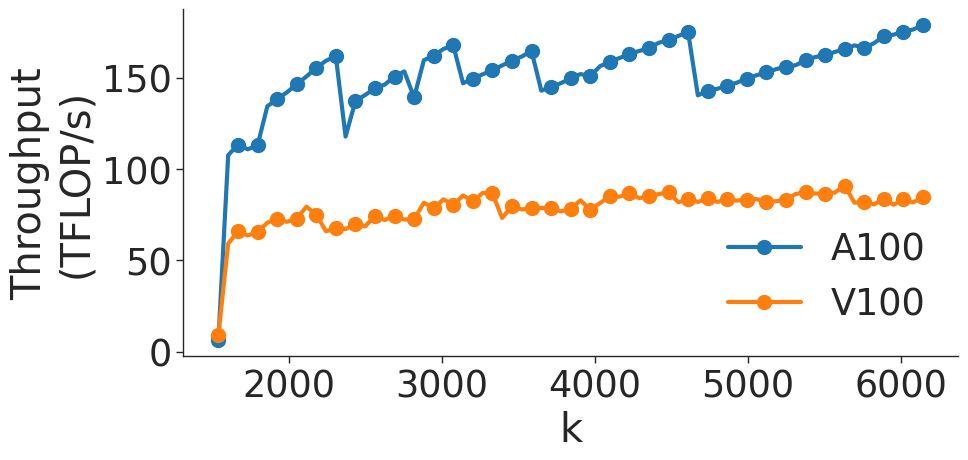

In [ ]:
plot_throughputs(read_logfile("logs/mm/a100/figure8.out"),
                 read_logfile("logs/mm/v100/figure8.out"),
                 'k', 'k', 'Throughput\n(TFLOP/s)',
                 output_filename='figure8.pdf', markevery=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


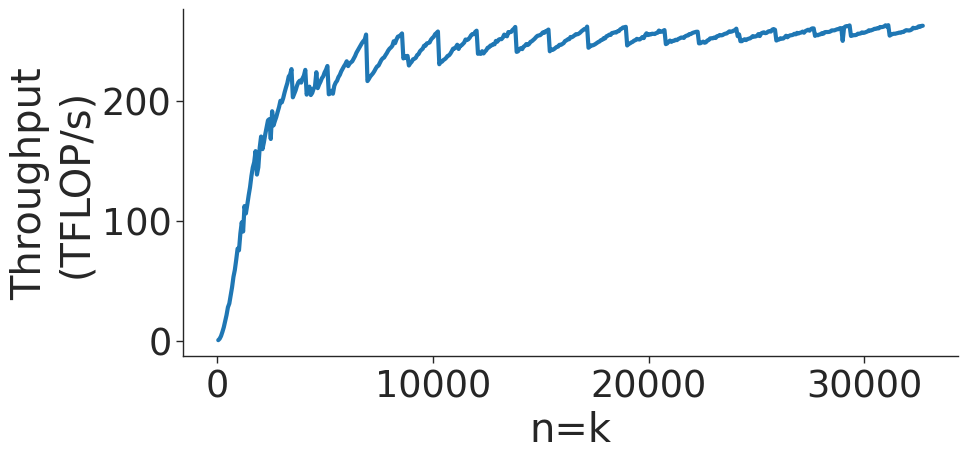

In [ ]:
plot_one_throughput(read_logfile("scripts/mmNKSweep.txt"),
                 'k', 'n=k', 'Throughput\n(TFLOP/s)',
                 output_filename='mmNKSweep.pdf', markevery=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


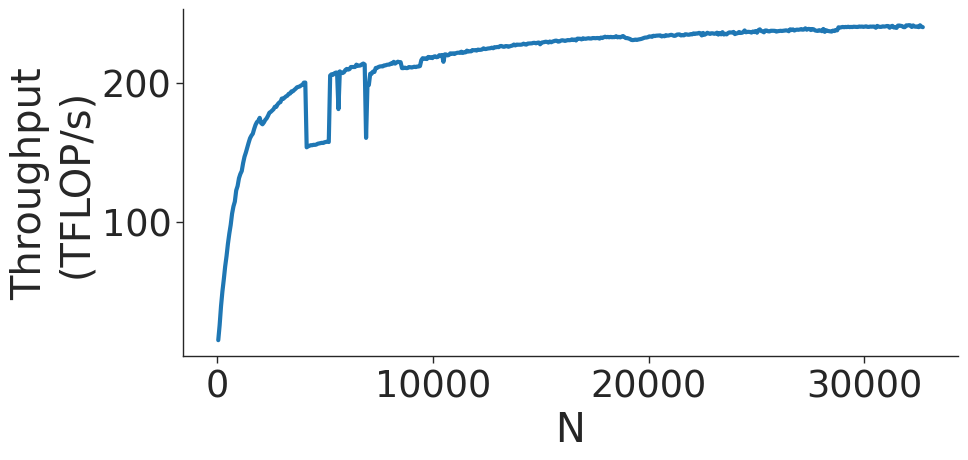

In [ ]:
plot_one_throughput(read_logfile("scripts/mmNSweep.txt"),
                 'n', 'N', 'Throughput\n(TFLOP/s)',
                 output_filename='mmNSweep.pdf', markevery=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


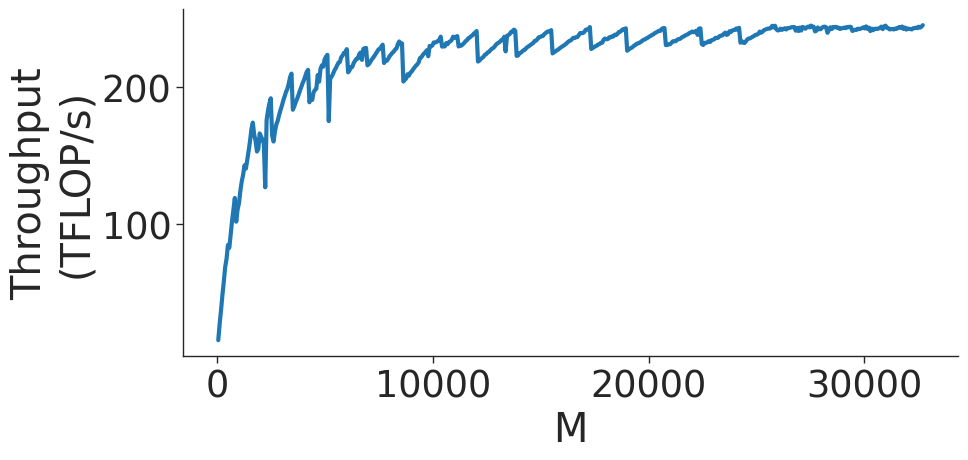

In [ ]:
plot_one_throughput(read_logfile("scripts/mmMSweep.txt"),
                 'm', 'M', 'Throughput\n(TFLOP/s)',
                 output_filename='mmMSweep.pdf', markevery=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


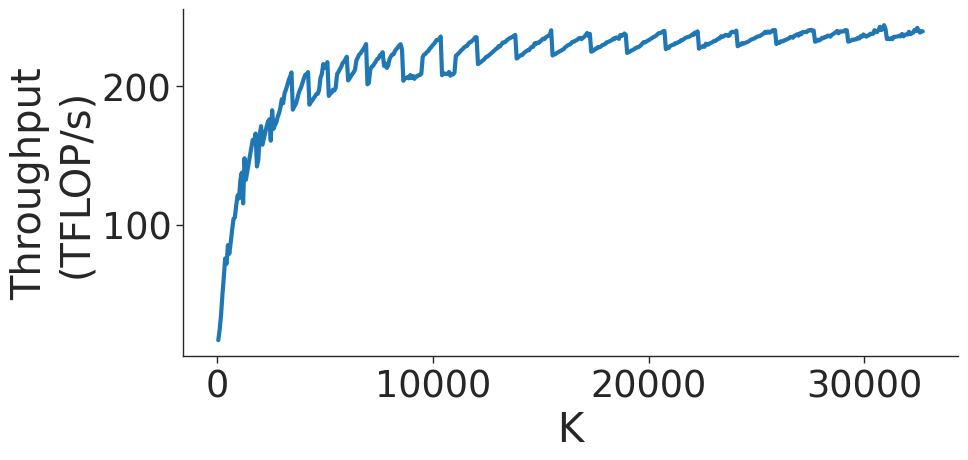

In [ ]:
plot_one_throughput(read_logfile("scripts/mmKSweep.txt"),
                 'k', 'K', 'Throughput\n(TFLOP/s)',
                 output_filename='mmKSweep.pdf', markevery=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


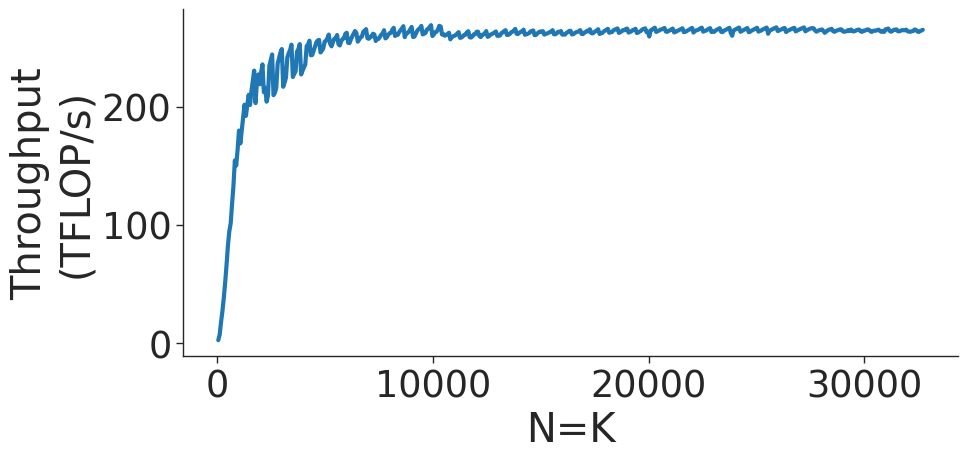

In [ ]:
plot_one_throughput(read_logfile("scripts/mm_n4kSweep.txt"),
                 'n', 'N=K', 'Throughput\n(TFLOP/s)',
                 output_filename='mmKSweep.pdf', markevery=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


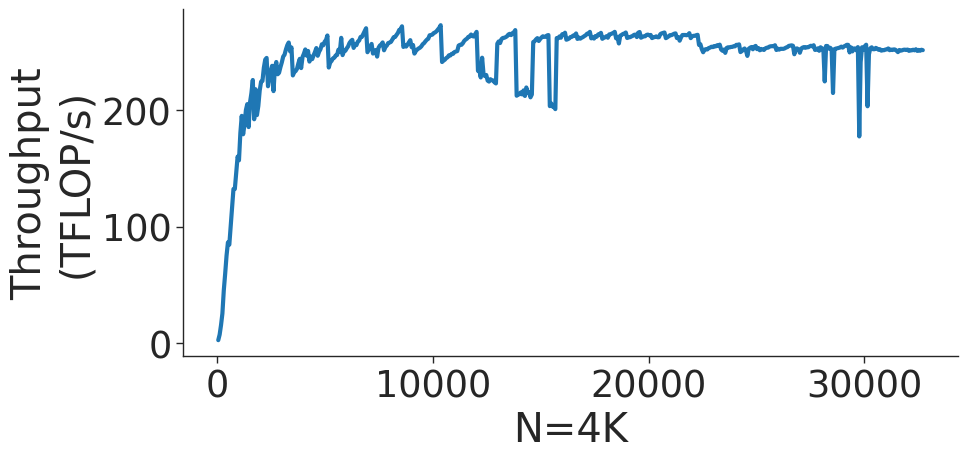

In [ ]:
plot_one_throughput(read_logfile("scripts/mm_4nkSweep.txt"),
                 'k', 'N=4K', 'Throughput\n(TFLOP/s)',
                 output_filename='mmKSweep.pdf', markevery=1)